    This is the jupyter notebook used for plotting stress-strain curves 
    of nonlinear soil of Nepal basin in Oral et al. (2022) 
    https://doi.org/10.1093/gji/ggac302

# 1) Import libraries
* Modify the path to JUPYTER

In [1]:
%matplotlib notebook

import sys

sys.path.append('/Users/elifo/Work/SOFT/sem2dpack/JUPYTER/')
sys.path.append('/Users/elifo/Work/SOFT/sem2dpack/JUPYTER/modules/')
from Class_sem2dpack import *

# 2) Input data
* Directory with output files
* Stress model (is_overburden): Depth-dependent (T) or Constant stress (F)

In [2]:
# Directory name with output files
direct1 = '/Volumes/LaCie/ELIF/Nepal/Simulation_files/THETA_0/RICKER_NONLI/'
is_overburden = True

# 3) Read output files

In [3]:
%%time 
SEM = sem2dpack(direct1)
SEM.read_nonlinear_backbone_data_tocorrect()
SEM.read_stress_strain() # this may take a while: ~2 min in my laptop
print ('*')

Reading grid information...
Reading header file...
0.003 6667 5977
Extra station number:  36015
*
*
CPU times: user 30.2 s, sys: 8.47 s, total: 38.6 s
Wall time: 1min 1s


# 4) Plot stress-strain curve at a selected location

In [4]:
def get_station_index(SEM, x_chosen=13865.468512, z_chosen=-60.0):
    nsta_extra = SEM.nsta_extra
    x_extra = SEM.extra_coord[:,0]
    z_extra = SEM.extra_coord[:,1]    
    cdt = ( abs(x_extra - x_chosen)+ abs(z_extra-z_chosen)== min(abs(x_extra - x_chosen)+ abs(z_extra-z_chosen)) )
    jj = np.where(cdt)[0]
    for _x, _z in zip(x_extra[jj], z_extra[jj]):
        print ('Found index and coordinate: ', _x, _z)
    return jj[0]
##

def get_backbone_curve(ii, SEM, rho=0.0, Vs=0.0, overburden_model=True):
    nsta_extra = SEM.nsta_extra
    x_extra = SEM.extra_coord[:,0]
    z_extra = SEM.extra_coord[:,1]
    if not overburden_model: _Gmod = rho* Vs* Vs
    if overburden_model:
            gref = SEM.nonlinear_curve[:,2]
            Gmod = SEM.nonlinear_curve[:,3]     
            x = SEM.nonlinear_curve[:,0]
            z = SEM.nonlinear_curve[:,1]
    #       
    backbone_found = True
    if overburden_model:
        dist = [ (x_extra[ii]- x_node)**2+ (z_extra[ii]- z_node)**2 for x_node, z_node in zip(x, z)]            
        x_nearest = SEM.nonlinear_curve[dist==min(dist), 0] [0]
        z_nearest = SEM.nonlinear_curve[dist==min(dist), 1] [0]   
        _gref = gref[dist==min(dist)][0]
        _Gmod = Gmod[dist==min(dist)][0]

        if len(SEM.nonlinear_curve[dist==min(dist), 0]) == 0:
            backbone_found = False
            print ('Backbone not found!')
    #
    if backbone_found:
        gamma, tau, G_over_G0 = compute_backbone_curve(gref=_gref, mu=_Gmod, Nspr=50)
        gamma *= 1e2; tau /= 1e3 
    ###ax.plot(gamma, tau, -gamma, -tau, c='k',alpha=0.9,linestyle='-', lw=0.5)     
    return gamma, tau
##

<IPython.core.display.Javascript object>


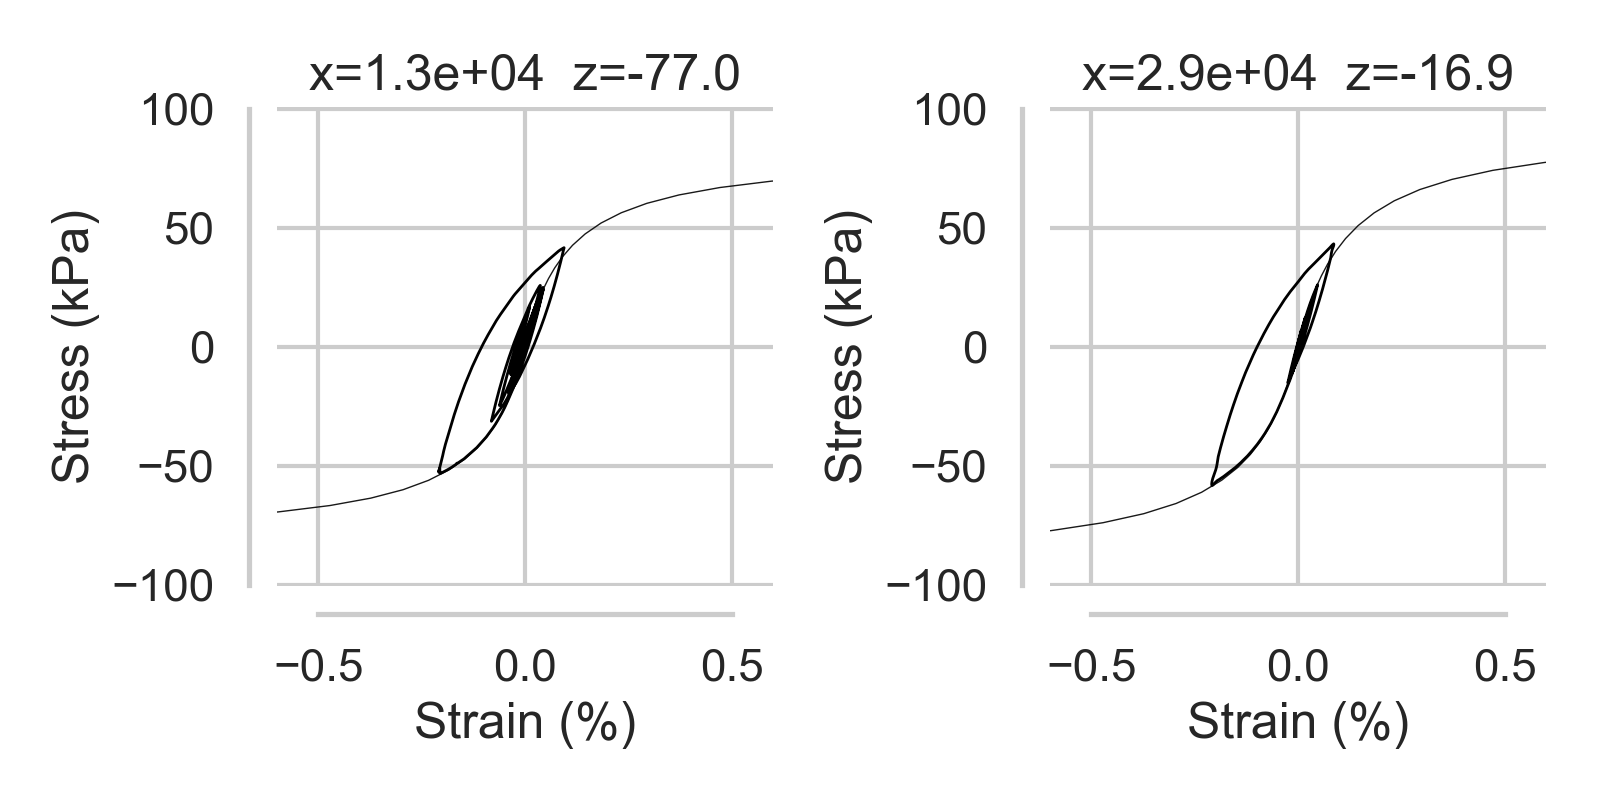

Found index and coordinate:  13463.1802419908 -73.3886759517824
Found index and coordinate:  13463.1802419908 -73.3886759517824
Found index and coordinate:  13463.1802419908 -73.3886759517824
Found index and coordinate:  13463.1802419908 -73.3886759517824
Found index and coordinate:  13463.1802419908 -73.3886759517824
Found index and coordinate:  28900.54 -17.8360525120212
Found index and coordinate:  28900.54 -17.8360525120212
Found index and coordinate:  28900.54 -17.8360525120212
Found index and coordinate:  28900.54 -17.8360525120212
Found index and coordinate:  28900.54 -17.8360525120212


In [5]:
### FIGURE ###
plt.close('all')
fig = plt.figure(figsize=(8,4))
set_style(whitegrid=True, scale=1.0)
sns.despine(offset=10, trim=True)

# location 1
xsta, zsta = 13.46e3, -77.0
ax = plt.subplot(121)
tit = 'x='+ '%.1e' % (xsta)+ '  z='+ '%.1f' % (zsta)
plt.title(tit)
kk = get_station_index(SEM, x_chosen=xsta, z_chosen=zsta)
plt.xlim(-0.6, 0.6); 
# plt.ylim(ymin, ymax)
plt.plot(SEM.strain[:,kk]*1e2, SEM.stress[:,kk]/1e3, c='k',lw=1)
gamma, tau = get_backbone_curve(kk, SEM, overburden_model=is_overburden)
plt.plot(gamma, tau, -gamma, -tau, c='k',alpha=0.9,linestyle='-', lw=0.5)
plt.xlabel('Strain (%)'); plt.ylabel('Stress (kPa)')

# location 2
xsta, zsta = 28.9e3, -16.9
plt.subplot(122, sharey=ax)
plt.xlim(-0.6, 0.6); 
tit = 'x='+ '%.1e' % (xsta)+ '  z='+ '%.1f' % (zsta)
plt.title(tit)
kk = get_station_index(SEM, x_chosen=xsta, z_chosen=zsta)
plt.plot(SEM.strain[:,kk]*1e2, SEM.stress[:,kk]/1e3, c='k',lw=1)
gamma, tau = get_backbone_curve(kk, SEM, overburden_model=is_overburden)
plt.plot(gamma, tau, -gamma, -tau, c='k',alpha=0.9,linestyle='-', lw=0.5)
plt.xlabel('Strain (%)'); plt.ylabel('Stress (kPa)')
#
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()
#